In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/python_course/iris.csv')
df = shuffle(df)
print(df)

     sepal_length  sepal_width  petal_length  petal_width       class
72            6.3          2.5           4.9          1.5  Versicolor
112           6.8          3.0           5.5          2.1   Virginica
132           6.4          2.8           5.6          2.2   Virginica
88            5.6          3.0           4.1          1.3  Versicolor
37            4.9          3.6           1.4          0.1      Setosa
..            ...          ...           ...          ...         ...
17            5.1          3.5           1.4          0.3      Setosa
98            5.1          2.5           3.0          1.1  Versicolor
66            5.6          3.0           4.5          1.5  Versicolor
126           6.2          2.8           4.8          1.8   Virginica
109           7.2          3.6           6.1          2.5   Virginica

[150 rows x 5 columns]


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
y = df['class']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
train_no = math.floor(X.shape[0]*.8)
test_no = math.ceil(X.shape[0]*.2)

print(train_no)
print(test_no)

120
30


In [ ]:
train_X, test_X = X[:train_no], X[train_no:]
train_y, test_y = y[:train_no], y[train_no:]

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(120, 4) (120,)
(30, 4) (30,)


[Text(0.4, 0.9166666666666666, 'petal_width <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [44, 39, 37]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.5, 0.75, 'petal_length <= 4.85\ngini = 0.5\nsamples = 76\nvalue = [0, 39, 37]'),
 Text(0.2, 0.5833333333333334, 'petal_width <= 1.7\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'sepal_length <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'petal_length <= 5.05\ngini = 0.142\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(0.7, 0.4166666666666667, 'sepal_length <= 6.2\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.25, 'petal_width <= 1.8\ngini = 0.375\nsamples = 

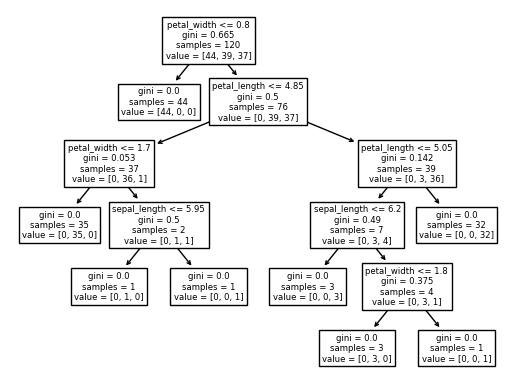

In [ ]:
dtree = DecisionTreeClassifier()
trained_dtree = dtree.fit(train_X, train_y)

tree.plot_tree(trained_dtree, feature_names=features)

In [ ]:
print(trained_dtree.predict([[2.5, 1.2, 2.2, 3.5]]))

['Versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predicted = trained_dtree.predict(test_X)
actual = test_y

In [ ]:
print(predicted)
print(actual)

['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Versicolor'
 'Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica'
 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Versicolor' 'Setosa'
 'Virginica' 'Virginica' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica'
 'Virginica']
120     Virginica
137     Virginica
125     Virginica
147     Virginica
39         Setosa
84     Versicolor
2          Setosa
67     Versicolor
55     Versicolor
49         Setosa
68     Versicolor
140     Virginica
78     Versicolor
144     Virginica
111     Virginica
32         Setosa
73     Versicolor
47         Setosa
148     Virginica
113     Virginica
96     Versicolor
57     Versicolor
123     Virginica
106     Virginica
83     Versicolor
17         Setosa
98     Versicolor
66     Versicolor
126     Virginica
109     Virginica
Name: class, dtype: object


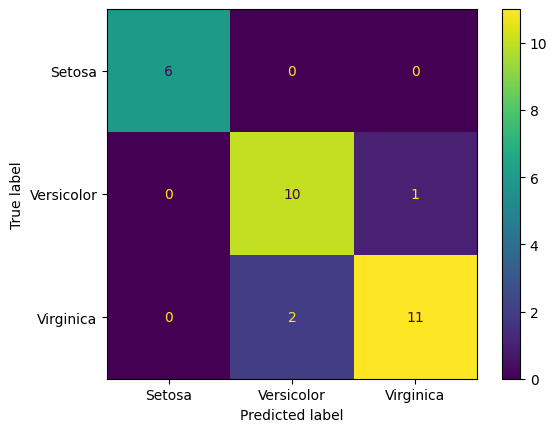

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = trained_dtree.classes_)

cm_display.plot()
plt.show()

In [ ]:
metrics.accuracy_score(actual, predicted)

0.9